# Coches results

In [3]:
# Scientific libraries
import numpy as np
import scipy


# Graphic libraries

import matplotlib.pyplot as plt
%matplotlib widget

plt.style.use("presentation")
plt.rcParams["figure.figsize"] = (4, 3)

# Creating alias for magic commands

# LPPview Classes
from LPPview import *
from LPPview.Classes.LPPic_temporal import History


In [4]:
root = "/DATA/tavant/"
folders = ["220_Coche_same_FakeR_2cm/", "219_Coche_same_fakeR/", "214_Coche_same_CE/"]
names = ["$L_R=2$ cm", "$L_R=2$ mm", "No $L_R$"]

paths = [root+f for f in folders]

found 3028 files
I've found a temporale file !
found 1 files
loading dat file
found 260 files
I've found a temporale file !
found 1 files
loading dat file
found 2278 files
I've found a temporale file !
found 1 files
loading dat file


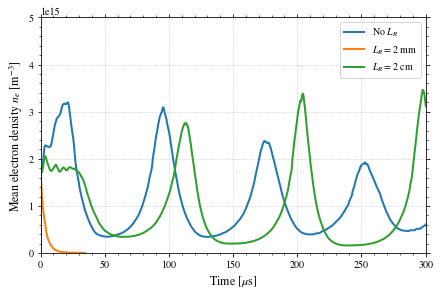

In [5]:

def plot_ne():
    plt.figure()

    for i in [2, 1, 0]:
        

        path=paths[i]
        
        F = field(path)
        H = History(path)
        temporal_data = H.return_history()
        #print(temporal_data.keys())
        time = temporal_data["time"]*1e6
        # rate =  (temporal_data["elec_SEE"] +  temporal_data["elec_SEE_sup"])/ temporal_data["elec_wal"]
        # rate[0] = 0
        mob = temporal_data["mobi"]
        ne = temporal_data["elec"]


        plt.plot(time, F._qf*ne, label=names[i])
        
        
    plt.xlim(0, 300)
    plt.xlabel("Time [$\mu$s]")
    
    plt.ylabel("Mean electron density $n_e$ [m$^{-3}$]")
    
    plt.legend()
    
    plt.ylim(bottom=0, top=5e15)
    
plot_ne()     
plt.savefig("Coches_mean_ne.pdf")

In [5]:

def plot_Te():
    plt.figure()

    for i in [2, 0]:
        

        path=paths[i]
        
        F = field(path)
        H = History(path)
        temporal_data = H.return_history()
        #print(temporal_data.keys())
        time = temporal_data["time"]*1e6
        # rate =  (temporal_data["elec_SEE"] +  temporal_data["elec_SEE_sup"])/ temporal_data["elec_wal"]
        # rate[0] = 0
        mob = temporal_data["mobi"]
        ne = (temporal_data["SUMe_x"] + temporal_data["SUMe_y"] +temporal_data["SUMe_z"] )/3


        plt.plot(time, ne, label=names[i])
        
        
    plt.xlim(0, 300)
    plt.xlabel("Time [$\mu$s]")
    
    plt.ylabel("Mean electron temperature T$_e$ [V]")
    
    plt.legend()
    
    #plt.ylim(bottom=0, top=5e15)
    
plot_Te()     
plt.savefig("Coches_mean_Te.pdf")

FigureCanvasNbAgg()

found 3028 files
I've found a temporale file !
found 1 files
loading dat file
found 2278 files
I've found a temporale file !
found 1 files
loading dat file


In [6]:

def plot_ne():
    plt.figure()

    for i in [2, 0, 1]:
        

        path=paths[i]
        
        F = field(path)
        H = History(path)
        temporal_data = H.return_history()
        #print(temporal_data.keys())
        time = temporal_data["time"]*1e6
        # rate =  (temporal_data["elec_SEE"] +  temporal_data["elec_SEE_sup"])/ temporal_data["elec_wal"]
        # rate[0] = 0
        mob = temporal_data["mobi"]
        ne = temporal_data["coll"]


        plt.plot(time, F._qf*ne, label=names[i])
        
        
    plt.xlim(0, 300)
    plt.xlabel("Time [$\mu$s]")
    
    plt.ylabel("Mean ionization rate [m$^{-3}$/s]")
    
    plt.legend()
    
    #plt.ylim(bottom=0, top=5e15)
    
plot_ne()     
plt.savefig("Coches_mean_Siz.pdf")

FigureCanvasNbAgg()

found 3028 files
I've found a temporale file !
found 1 files
loading dat file
found 2278 files
I've found a temporale file !
found 1 files
loading dat file
found 260 files
I've found a temporale file !
found 1 files
loading dat file


In [7]:

def plot_ne_profile():
    plt.figure()

    ymax = 0
    for i, tmin, tmax in zip([2, 0], [170, 200], [250, 300]) :
        

        path=paths[i]
        
        F = field(path)
        H = History(path)
        temporal_data = H.return_history()
        #print(temporal_data.keys())
        time = temporal_data["time"]*1e6
        # rate =  (temporal_data["elec_SEE"] +  temporal_data["elec_SEE_sup"])/ temporal_data["elec_wal"]
        # rate[0] = 0
        mob = temporal_data["mobi"]
        ne = temporal_data["coll"]
        imin = tmin*1e-6/F._dT/F._Na/F._nT
        imax = tmax*1e-6/F._dT/F._Na/F._nT
        
        F.outputobject.parameters = {}
        F.definecoords()
        t = F.meanfield("Nume", "x", imin=imin, imax=imax)
        
        ymax = max(ymax, t.max())
        plt.plot(F.tab_y, t, label=names[i])
        
        
    b = F.meanfield("B(3)", "x", imin=imin, imax=imax)
    
    plt.plot(F.tab_y, b/b.max()*ymax, "--", label="$B_R$ (normalized)")
    
    plt.vlines(2.5, 0,ymax, "k", ":", alpha=0.7 )
    plt.xlim(0, 4)
    plt.xlabel("Axial position", fontsize=11)
    
    plt.ylabel("Electron density [m$^{-3}$]", fontsize=11)
    
    plt.legend(fontsize=10)
    
    #plt.ylim(bottom=0, top=5e15)
    
plot_ne_profile()     
plt.savefig("Coches_mean_ne_profile.pdf")

FigureCanvasNbAgg()

found 3028 files
I've found a temporale file !
found 1 files
loading dat file
3028
calculating the mean between 169.99$ \mu s$  and 249.95$ \mu s$
found 2278 files
I've found a temporale file !
found 1 files
loading dat file
2278
calculating the mean between 199.90$ \mu s$  and 299.99$ \mu s$
2278
calculating the mean between 199.90$ \mu s$  and 299.99$ \mu s$


In [94]:

def plot_Ez_profile():
    plt.figure()

    ymax = 0
    for i, tmin, tmax in zip([2, 0], [170, 200], [250, 300]) :
        

        path=paths[i]
        
        F = field(path)
        H = History(path)
        temporal_data = H.return_history()
        #print(temporal_data.keys())
        time = temporal_data["time"]*1e6
        # rate =  (temporal_data["elec_SEE"] +  temporal_data["elec_SEE_sup"])/ temporal_data["elec_wal"]
        # rate[0] = 0
        mob = temporal_data["mobi"]
        ne = temporal_data["coll"]
        imin = tmin*1e-6/F._dT/F._Na/F._nT
        imax = tmax*1e-6/F._dT/F._Na/F._nT
        
        F.outputobject.parameters = {}
        F.definecoords()
        t = F.meanfield("Ej(2)", "x", imin=imin, imax=imax)*1e-3
        
        ymax = max(ymax, t.max())
        plt.plot(F.tab_y, t, label=names[i])
        
    ymax = 30    
    b = F.meanfield("B(3)", "x", imin=imin, imax=imax)
    
    plt.plot(F.tab_y, b/b.max()*ymax, "--", label="$B_R$ (normalized)")
    
    plt.vlines(2.5, 0,ymax, "k", ":", alpha=0.7 )
    plt.hlines(0, 0,4, "k", alpha=0.7 ,linewidth=1.5)
    plt.xlim(0, 4)
    plt.xlabel("Axial position", fontsize=11)
    
    plt.ylabel("Axial electric field $E_{z}$ [kV/m]", fontsize=11)
    
    plt.legend(fontsize=10)
    
    plt.ylim(bottom=-10, top=ymax)
    
plot_Ez_profile()     
plt.savefig("Coches_mean_Ez_profile.pdf")

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


FigureCanvasNbAgg()

found 3028 files
I've found a temporale file !
found 1 files
loading dat file
3028
calculating the mean between 169.99$ \mu s$  and 249.95$ \mu s$
found 2278 files
I've found a temporale file !
found 1 files
loading dat file
2278
calculating the mean between 199.90$ \mu s$  and 299.99$ \mu s$
2278
calculating the mean between 199.90$ \mu s$  and 299.99$ \mu s$


In [9]:

def plot_Te_profile():
    plt.figure()

    ymax = 0
    for i, tmin, tmax in zip([2, 0], [170, 200], [250, 300]) :
        
        try:
            path=paths[i]

            F = field(path)
            H = History(path)
            temporal_data = H.return_history()
            #print(temporal_data.keys())
            time = temporal_data["time"]*1e6
            # rate =  (temporal_data["elec_SEE"] +  temporal_data["elec_SEE_sup"])/ temporal_data["elec_wal"]
            # rate[0] = 0
            mob = temporal_data["mobi"]
            ne = temporal_data["coll"]
            imin = tmin*1e-6/F._dT/F._Na/F._nT
            imax = tmax*1e-6/F._dT/F._Na/F._nT

            F.outputobject.parameters = {}
            F.definecoords()
            
            
            t = F.meanfield("Eke(2)", "x", imin=imin, imax=imax)

            ymax = max(ymax, t.max())
            plt.plot(F.tab_y, 2*t, label="T$_{e, z}$")
            
            t = F.meanfield("Eke(1)", "x", imin=imin, imax=imax)

            ymax = max(ymax, t.max())
            plt.plot(F.tab_y, 2*t, label="T$_{e, \\theta}$")
            t = F.meanfield("Eke(3)", "x", imin=imin, imax=imax)

            ymax = max(ymax, t.max())
            plt.plot(F.tab_y, 2*t, label="T$_{e, R}$")
            
            print(names[i])
        except:
            pass
        
    b = F.meanfield("B(3)", "x", imin=imin, imax=imax)
    
    plt.plot(F.tab_y, b/b.max()*ymax*2, "--", label="$B_R$")
    
    plt.vlines(2.5, 0,ymax*2, "k", ":", alpha=0.7 )
    plt.hlines(0, 0,4, "k", alpha=0.7 ,linewidth=1.5)
    plt.xlim(0, 4)
    plt.xlabel("Axial position [cm]", fontsize=11)
    
    plt.ylabel("Electron temperature T$_{e}$ [V]", fontsize=11)
    
    plt.legend(fontsize=10)
    
    plt.ylim(bottom=0, top=ymax*1.1*2)
    
plot_Te_profile()     
plt.savefig("Coches_mean_Tez_profile.pdf")

FigureCanvasNbAgg()

found 3028 files
I've found a temporale file !
found 1 files
loading dat file
3028
calculating the mean between 169.99$ \mu s$  and 249.95$ \mu s$
found 2278 files
I've found a temporale file !
found 1 files
loading dat file
2278
calculating the mean between 199.90$ \mu s$  and 299.99$ \mu s$
2278
calculating the mean between 199.90$ \mu s$  and 299.99$ \mu s$
2278
calculating the mean between 199.90$ \mu s$  and 299.99$ \mu s$
$L_R=2$ cm
2278
calculating the mean between 199.90$ \mu s$  and 299.99$ \mu s$


In [96]:
F.definecoords()

In [97]:
tab = F.return_cut2d(label="Ri", axe="x", position=0.5)

 2277  over  2278

In [98]:
plt.figure()
plt.imshow(tab[:, ::-1],
           origin="lower left", vmax=1e24)
plt.colorbar()

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


FigureCanvasNbAgg()

In [17]:
F = field(paths[0])
F??

found 2278 files


Type:        field
String form: <LPPview.Classes.LPPic_fields.field object at 0x7f7c3132f978>
File:        ~/LPPview/LPPview/Classes/LPPic_fields.py
Source:     
class field(LPPic.LPPic):
    """docstring for field."""
    def __init__(self,path):
        super(field, self).__init__(path) #run the init of the mother class
        #with get path, get memo
        self.getallfiles('tabgrid')
        inputobject = inputparams(path)
        inputobject.autodump()
        try:
            self._Z_theta = inputobject.parameters['Z_theta']
        except:
            self._Z_theta = False

    def return_fromkey(self,i,hdf_key,keepdiel = False):
        #print(i)
        """Return a 2d np array from a given H5 file
        exemple : run.return_fromkey(i,'Phi')
        add diel to keep the dielectric cells"""
        #TODO : add dielectric removal

        self.label = hdf_key

        if hdf_key in ["rho", "Rho"]:
            if len(self.species_list) > 1:
                raise RuntimeWarning

In [12]:
from LPPview.Classes.LPPic_fields import field